In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [2]:
cifar_10 = keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar_10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [44]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

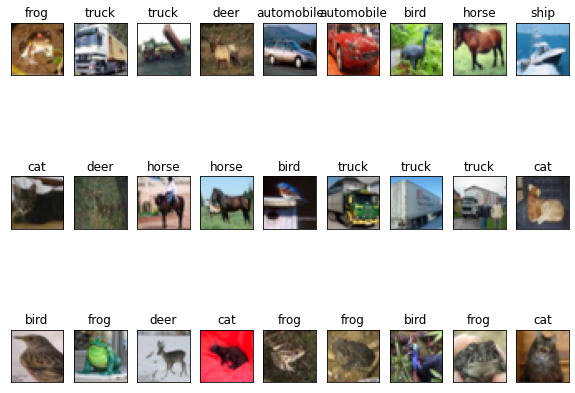

In [47]:
fig, axes = plt.subplots(ncols=9, nrows=3, figsize=(10, 8))
index = 0
for i in range(3):
    for j in range(9):
        axes[i,j].set_title(classes[y_train[index][0]])
        axes[i,j].imshow(x_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Normalize the data
x_train = x_train/255.0
x_test = x_test/255.0

In [25]:
#define the CNN Model
model = keras.models.Sequential([
        keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(32,32,3)),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Flatten(),
        keras.layers.Dense(256, activation='relu'),
        #keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')

])

In [26]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 2, 2, 128)       

In [27]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
history = model.fit(x_train,y_train, batch_size=64, epochs=30, validation_data=(x_test,y_test))

Epoch 1/30
782/782 [==============================] - 11s 13ms/step - loss: 1.5344 - accuracy: 0.4371 - val_loss: 1.2580 - val_accuracy: 0.5461
Epoch 2/30
782/782 [==============================] - 9s 12ms/step - loss: 1.1485 - accuracy: 0.5928 - val_loss: 1.0490 - val_accuracy: 0.6359
Epoch 3/30
782/782 [==============================] - 9s 12ms/step - loss: 0.9866 - accuracy: 0.6543 - val_loss: 0.9981 - val_accuracy: 0.6518
Epoch 4/30
782/782 [==============================] - 10s 12ms/step - loss: 0.8766 - accuracy: 0.6930 - val_loss: 0.8874 - val_accuracy: 0.6914
Epoch 5/30
782/782 [==============================] - 9s 12ms/step - loss: 0.7862 - accuracy: 0.7264 - val_loss: 0.8922 - val_accuracy: 0.6877
Epoch 6/30
782/782 [==============================] - 9s 11ms/step - loss: 0.7146 - accuracy: 0.7510 - val_loss: 0.8422 - val_accuracy: 0.7103
Epoch 7/30
782/782 [==============================] - 9s 12ms/step - loss: 0.6562 - accuracy: 0.7724 - val_loss: 0.8381 - val_accuracy: 0.71

In [14]:
score = model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.7759 - accuracy: 0.7128


In [13]:
plt.plot(score.score["loss"], label = "Testing Loss")
plt.plot(score.score['accuracy'], label="Testing Accuracy")
plt.xlabel("Epochs")

Test loss: 1.7759051322937012 / Test accuracy:1.7759051322937012


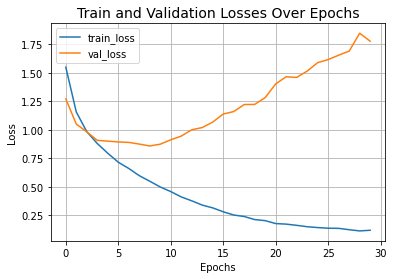

In [15]:
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()

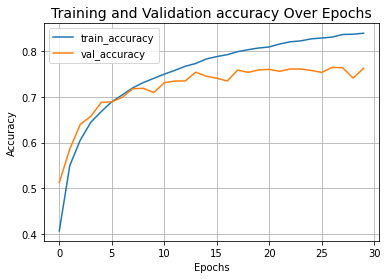

In [41]:
plt.plot(history.history["accuracy"], label="train_accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation accuracy Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()

Adding Dropout in this network. Used this network to run the experiment for DL term paper.

In [32]:
cnnModel = keras.models.Sequential([
        keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(32,32,3)),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Flatten(),
        keras.layers.Dropout(rate=0.4),
        keras.layers.Dense(256, activation='relu'),
        #keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(10, activation='softmax')

])

In [33]:
cnnModel.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 2, 2, 128)       

In [34]:
cnnModel.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
history = cnnModel.fit(x_train,y_train, batch_size=64, epochs=30, validation_data=(x_test,y_test))

Epoch 1/30
782/782 [==============================] - 10s 12ms/step - loss: 1.6100 - accuracy: 0.4064 - val_loss: 1.3410 - val_accuracy: 0.5125
Epoch 2/30
782/782 [==============================] - 9s 11ms/step - loss: 1.2541 - accuracy: 0.5496 - val_loss: 1.1394 - val_accuracy: 0.5861
Epoch 3/30
782/782 [==============================] - 9s 11ms/step - loss: 1.1073 - accuracy: 0.6056 - val_loss: 1.0110 - val_accuracy: 0.6400
Epoch 4/30
782/782 [==============================] - 10s 12ms/step - loss: 1.0043 - accuracy: 0.6446 - val_loss: 0.9796 - val_accuracy: 0.6576
Epoch 5/30
782/782 [==============================] - 10s 12ms/step - loss: 0.9387 - accuracy: 0.6682 - val_loss: 0.8777 - val_accuracy: 0.6883
Epoch 6/30
782/782 [==============================] - 9s 11ms/step - loss: 0.8812 - accuracy: 0.6897 - val_loss: 0.8824 - val_accuracy: 0.6895
Epoch 7/30
782/782 [==============================] - 9s 11ms/step - loss: 0.8390 - accuracy: 0.7047 - val_loss: 0.8583 - val_accuracy: 0.6

In [40]:
cnnModel.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.7306 - accuracy: 0.7631


[0.7306044101715088, 0.7631000280380249]

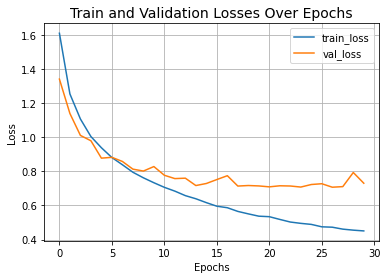

In [36]:
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()

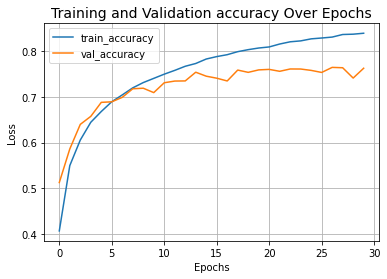

In [37]:
plt.plot(history.history["accuracy"], label="train_accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation accuracy Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()